### Universidad Católica "Nuestra Señora de la Asunción"
### Facultad de Ciencias y Tecnología
---

#Telecomunicaciones 1

#Laboratorio PSK

---

**Contenido:**


1.   Generación de señales PSK

---

**1) Generación de Señales PSK:**

PSK paso-banda

$s_m(t)=g(t)\cos(2\pi f_c t + \theta_m)$ para  $\theta_m= 2\pi (m-1)/M$

M= 4
Fases= [0.         1.57079633 3.14159265 4.71238898]


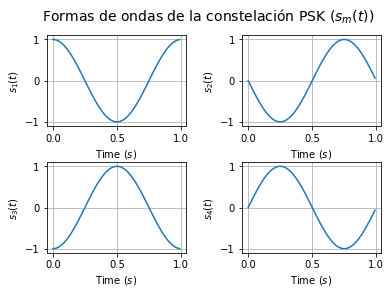

Secuencia de entrada= [0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
Simbolos= [0 1 2 3 1 1 2 2]
Fases Trasmitidas= [  0.  90. 180. 270.  90.  90. 180. 180.]


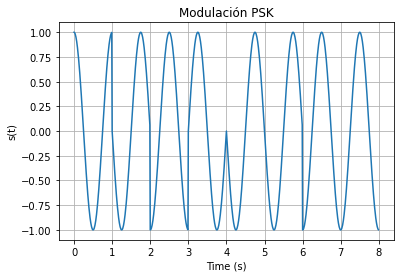

In [3]:
import matplotlib.pylab as plt
import numpy as np
import math

# Definimos secuencia de bits de entrada a transmitir (Se puede modificar la secuecnai para fines de prueba)
I=[0,0,0,1,1,0,1,1,0,1,0,1,1,0,1,0]   #Debe ser multiplo de k= log2 M

M= 4      # Cantidad de simbolos/fases
Ts= 0.01  #Sampling time de nuestro script
k= int(math.log(M,2)) #Longitud del vectores de simbolos o bloque bits
Tsym= 1   # Tiempo de simbolo
Tsim= len(I)/k*Tsym   # Tiempo total de simulación
print("M=", M)

fc=1
t = np.arange(0,Tsim,Ts)
tsym=np.arange(0,Tsym,Ts)

# Generamos g(t)
g=np.ones(int(Tsim/Ts)) #Pulso rectangular

# Generamos las fases a transmitir
theta=np.arange(0,2*np.pi,2*np.pi/M)
print("Fases=", theta)

#Generamos el vector de simbolos atendiendo al secuencia binaria de entarda
symbols= np.zeros(int(len(I)/k),dtype=int)

for i in range(0,len(symbols),1):
  for j in range(0,k,1):
    #print("Indice=",(i+1)*k-j-1)
    symbols[i]=symbols[i] + I[(i+1)*k-j-1]*math.pow(2,k+j-2)

#Graficamos las señales de los simbolos
for i in range(1, M+1):
    plt.subplot(M/2, M/2, i)
    plt.plot(tsym,np.cos(2*np.pi*fc*tsym +theta[symbols[i-1]]));
    plt.xlabel('Time ($s$)');
    plt.ylabel('$s_'+str(i)+'(t)$');
    plt.grid(True)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.suptitle('Formas de ondas de la constelación PSK ($s_m(t)$)', fontsize=14)
plt.show()

print("Secuencia de entrada=",I)  
print("Simbolos=",symbols)

# Generamos s(t)
#s=np.zeros(int(Tsim/Ts))
s=[]
theta_TX=np.zeros(int(len(I)/k))
for i in range(len(symbols)):
  theta_TX[i]=theta[symbols[i]]
  s=np.append(s,np.cos(2*np.pi*fc*tsym +theta[symbols[i]]))

print("Fases Trasmitidas=",np.rad2deg(theta_TX))

# print("Longitud de Symbols=",len(symbols))
# print("Longitud de t=",len(t))
# print("Longitud de s=",len(s))

# Graficamos el resultado s(t)
plt.plot(t,s);
plt.title('Modulación PSK');
plt.xlabel('Time (s)');
plt.ylabel('s(t)');
plt.grid(True)
plt.show()

**IMPORTANT**


1.   En este esquema sin memoria, PSK, vemos como el mudulador se comporta básicamente como un **mapeador**; le asigna formas de onda a la entrada de forma unívoca a los símbolos a transmitir.
2.   Esto no era muy visible aún en PAM por ejemplo, ya que la secuencia se símbols se pasaba por un modulador producto (multiplicar la secuncia de símbolos/amplitudes por la portadora) de manera continua.
3. Para fines gráficos, seguimos haciendo que el tiempo de símbolo sea un multiplo entero del periodo de la portadora. Repetimos que esto **no es necesario**.


